# Crop Recommendation

In [1]:
import pandas as pd
import numpy as np

## Import Data

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

## Check Data

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [8]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
crop.duplicated().sum()

0

In [10]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
import seaborn as sns

**Check class distribution for the label**

<Axes: xlabel='label', ylabel='count'>

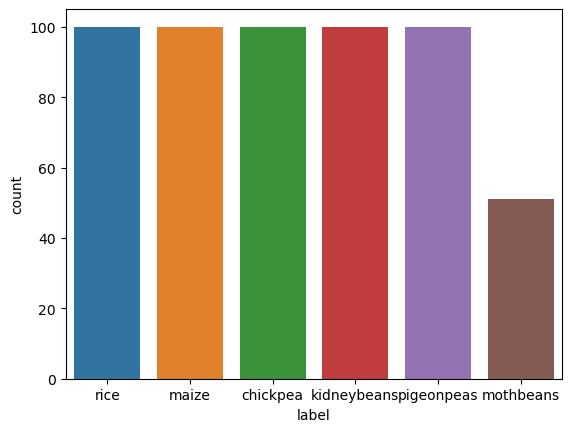

In [27]:
sns.countplot(x=crop.loc[0:550]['label'])

<Axes: >

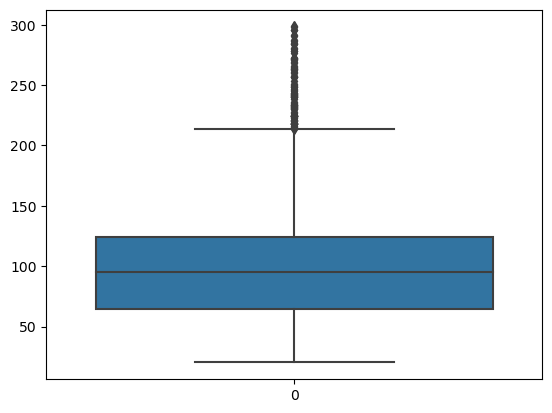

In [62]:
sns.boxplot(data=crop['rainfall'])

In [64]:
CorrMat = crop.corr(numeric_only=True)

<Axes: >

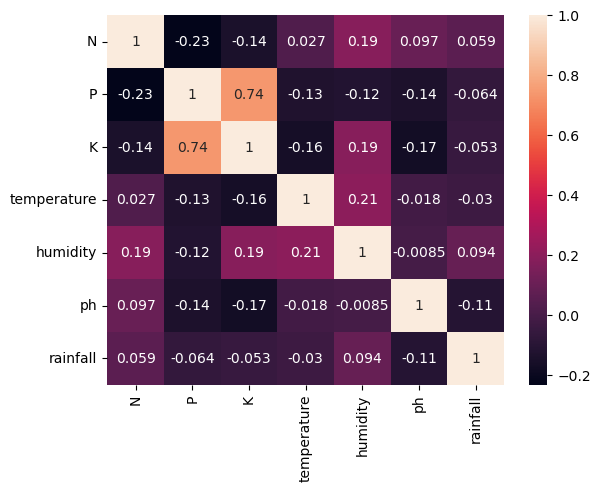

In [66]:
sns.heatmap(CorrMat,annot=True,cbar=True)

**Correlation between P and K is close to 1 meaning the variables have strong positive correlation. Similarly, N and P have strong negative correlation.**

C:\Users\nish3395\AppData\Local\Temp\ipykernel_15496\2091051290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


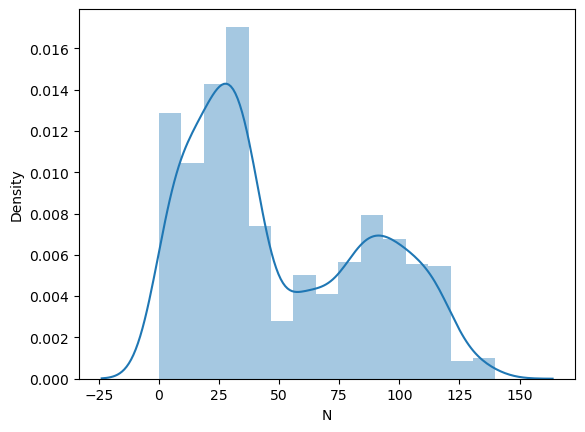

In [67]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

# Preprocessing - Encoding

In [99]:
crop_names = crop['label'].value_counts().index

In [100]:
crop_dict_df = pd.DataFrame(crop_names)

In [101]:
crop_dict_df['values'] = df.index

In [103]:
crop_dict_df['values'] = crop_dict_df['values'].apply(lambda x: x+1)

In [104]:
crop_dict_df

,label,values
0,rice,1
1,maize,2
2,jute,3
3,cotton,4
4,coconut,5
5,papaya,6
6,orange,7
7,apple,8
8,muskmelon,9
9,watermelon,10


In [110]:
crop_dict_df.set_index(crop_dict_df['label'],inplace=True)

In [113]:
crop_dict_df = crop_dict_df.drop(['label'],axis=1)

In [115]:
crop_dict = crop_dict_df.to_dict()

In [118]:
crop_dict = crop_dict['values']

In [119]:
crop['cat_label'] = crop['label'].map(crop_dict)

In [120]:
crop['cat_label'].value_counts()

cat_label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [121]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,cat_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [123]:
crop.drop(['label'],axis=1, inplace=True)

In [124]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,cat_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


# Train Test Split

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
label = crop[['cat_label']]
features = crop[['N','P','K','temperature','humidity', 'ph', 'rainfall']]

In [176]:
features.shape

(2200, 7)

In [177]:
label.shape

(2200, 1)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)

In [179]:
X_train.shape

(1474, 7)

In [180]:
y_train.shape

(1474, 1)

In [181]:
X_test.shape

(726, 7)

In [182]:
y_test.shape

(726, 1)

# Preprocessing - Scaling

In [183]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
ms = MinMaxScaler()

In [185]:
ms.fit(X_train)

MinMaxScaler()

In [186]:
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [187]:
X_train

array([[0.57857143, 0.07857143, 0.2       , ..., 0.83995947, 0.5011736 ,
        0.14162392],
       [0.22142857, 0.93571429, 0.96      , ..., 0.80595368, 0.33420072,
        0.18357291],
       [0.02142857, 0.41428571, 0.055     , ..., 0.54741671, 0.52316522,
        0.1178269 ],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43766892, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76775145, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56108125, 0.54465022,
        0.11879596]])

In [188]:
X_test

array([[0.72142857, 0.08571429, 0.21      , ..., 0.93886226, 0.41682113,
        0.021381  ],
       [0.7       , 0.02142857, 0.23      , ..., 0.84309053, 0.42837304,
        0.10449492],
       [0.42142857, 0.40714286, 0.22      , ..., 0.92278332, 0.5344578 ,
        0.33938901],
       ...,
       [0.17142857, 0.4       , 0.06      , ..., 0.59713756, 0.42431931,
        0.06450069],
       [0.00714286, 0.40714286, 0.09      , ..., 0.04786116, 0.32705217,
        0.42656415],
       [0.63571429, 0.55714286, 0.21      , ..., 0.74125689, 0.330701  ,
        0.32056368]])

In [189]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [190]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [191]:
X_train

array([[ 7.85103870e-01, -1.11261654e+00, -6.71779400e-02, ...,
         6.51663360e-01,  3.32265152e-01, -7.68361572e-01],
       [-5.52904113e-01,  2.47697969e+00,  2.91028657e+00, ...,
         5.15937135e-01, -1.07726916e+00, -5.59461248e-01],
       [-1.30218858e+00,  2.93308652e-01, -6.35246827e-01, ...,
        -5.15953205e-01,  5.17911719e-01, -8.86867503e-01],
       ...,
       [-1.08810731e+00, -5.14350500e-01, -3.41418092e-01, ...,
        -9.53986078e-01,  1.41685870e-03, -4.34216179e-02],
       [-1.08810731e+00,  2.11802007e+00,  3.04740665e+00, ...,
         3.63461798e-01, -1.48646040e-01, -5.59990836e-01],
       [-5.26143953e-01,  7.42008180e-01, -5.17715333e-01, ...,
        -4.61414369e-01,  6.99281546e-01, -8.82041699e-01]])

In [192]:
X_test

array([[ 1.32030706, -1.08270324, -0.02800078, ...,  1.04641087,
        -0.37981278, -1.36715499],
       [ 1.24002658, -1.35192295,  0.05035355, ...,  0.66416025,
        -0.28229503, -0.95325894],
       [ 0.19638036,  0.26339535,  0.01117639, ...,  0.98223553,
         0.61324023,  0.21648181],
       ...,
       [-0.74022523,  0.23348205, -0.61565824, ..., -0.317504  ,
        -0.31651545, -1.15242478],
       [-1.3557089 ,  0.26339535, -0.49812675, ..., -2.50981333,
        -1.13761509,  0.65060218],
       [ 0.99918515,  0.89157469, -0.02800078, ...,  0.25771491,
        -1.10681275,  0.1227342 ]])

# Training Model

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [194]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier()
}

In [195]:
for name, model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    accuracy = accuracy_score(y_test,ypred)
    print(f"{name} with accuracy : {accuracy}")

C:\Users\nish3395\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nish3395\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nish3395\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

Logistic Regression with accuracy : 0.9641873278236914
Naive Bayes with accuracy : 0.9944903581267218
Support Vector Machine with accuracy : 0.9738292011019284
K-Nearest Neighbors with accuracy : 0.9586776859504132
Decision Tree with accuracy : 0.9738292011019284


C:\Users\nish3395\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nish3395\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest with accuracy : 0.9917355371900827
Bagging with accuracy : 0.987603305785124


C:\Users\nish3395\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nish3395\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost with accuracy : 0.1584022038567493


C:\Users\nish3395\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting with accuracy : 0.9848484848484849
Extra Trees with accuracy : 0.90633608815427


In [196]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

C:\Users\nish3395\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9931129476584022

# Prediction

In [305]:
def recommend(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]]).reshape(1,-1)
    features = ms.transform(features)
    features = ss.transform(features)
    prediction = rfc.predict(features)
    return prediction[0]

In [304]:
N = 20
P = 130
K = 199
temperature = 22
humidity = 92
ph = 5
rainfall = 112
# 20.80	134.22	199.89	22.630942	92.333383	5.929663	112.654779

In [284]:
crop_dict

{'rice': 1,
 'maize': 2,
 'jute': 3,
 'cotton': 4,
 'coconut': 5,
 'papaya': 6,
 'orange': 7,
 'apple': 8,
 'muskmelon': 9,
 'watermelon': 10,
 'grapes': 11,
 'mango': 12,
 'banana': 13,
 'pomegranate': 14,
 'lentil': 15,
 'blackgram': 16,
 'mungbean': 17,
 'mothbeans': 18,
 'pigeonpeas': 19,
 'kidneybeans': 20,
 'chickpea': 21,
 'coffee': 22}

In [287]:
crop_dict.items()

dict_items([('rice', 1), ('maize', 2), ('jute', 3), ('cotton', 4), ('coconut', 5), ('papaya', 6), ('orange', 7), ('apple', 8), ('muskmelon', 9), ('watermelon', 10), ('grapes', 11), ('mango', 12), ('banana', 13), ('pomegranate', 14), ('lentil', 15), ('blackgram', 16), ('mungbean', 17), ('mothbeans', 18), ('pigeonpeas', 19), ('kidneybeans', 20), ('chickpea', 21), ('coffee', 22)])

In [288]:
check_crops = {values: key for key, values in crop_dict.items()}

In [289]:
check_crops

{1: 'rice',
 2: 'maize',
 3: 'jute',
 4: 'cotton',
 5: 'coconut',
 6: 'papaya',
 7: 'orange',
 8: 'apple',
 9: 'muskmelon',
 10: 'watermelon',
 11: 'grapes',
 12: 'mango',
 13: 'banana',
 14: 'pomegranate',
 15: 'lentil',
 16: 'blackgram',
 17: 'mungbean',
 18: 'mothbeans',
 19: 'pigeonpeas',
 20: 'kidneybeans',
 21: 'chickpea',
 22: 'coffee'}

In [306]:
predict = recommend(N, P, K, temperature, humidity, ph, rainfall)
if predict in check_crops:
    crop = check_crops[predict]
    print("Best crop is {}".format(crop))
else:
    print("No recommendation")

Best crop is apple


C:\Users\nish3395\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [296]:
val = pd.read_csv("Crop_recommendation.csv")

In [303]:
val.groupby(['label']).mean()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


# Saving model

In [307]:
import pickle
pickle.dump(rfc,open('crop_model.pkl','wb'))

In [308]:
val.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [309]:
import pickle
pickle.dump(ss,open('standardscaler.pkl','wb'))

In [310]:
import pickle
pickle.dump(ms,open('minmaxscaler.pkl','wb'))

In [314]:
import sklearn
sklearn.__version__

'1.3.0'